In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import itertools
import keras
%matplotlib inline
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [2]:
df=pd.read_csv("BankChurners.xls")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df=df.iloc[:,1:-2] # dropping the first column and the last 2 columns 
df.sample(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
5055,Attrited Customer,38,M,2,Uneducated,Single,$120K +,Blue,30,6,3,4,4043.0,2517,1526.0,0.602,2600,47,0.621,0.623
7906,Attrited Customer,48,F,2,Graduate,Single,Less than $40K,Blue,41,4,2,3,2168.0,1323,845.0,0.687,2499,38,0.407,0.610
8565,Existing Customer,39,F,1,Graduate,Single,Less than $40K,Blue,21,1,2,1,2867.0,1365,1502.0,0.502,4445,89,0.745,0.476


In [4]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [5]:
df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

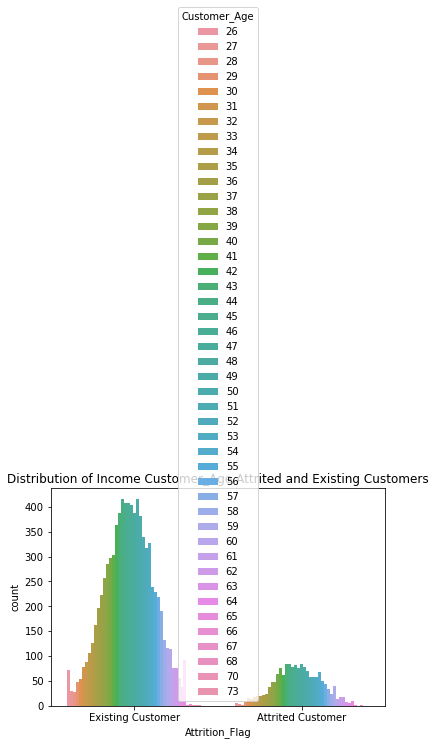

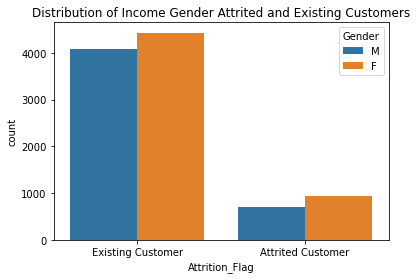

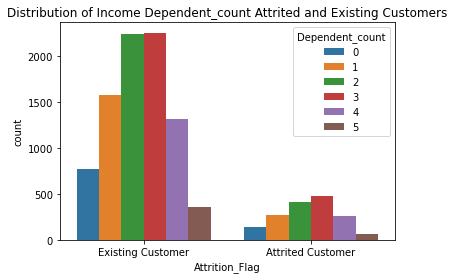

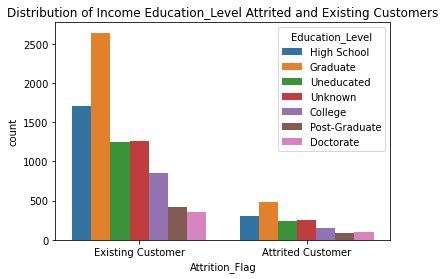

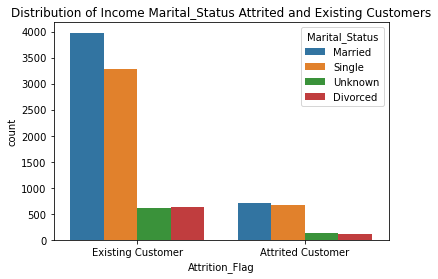

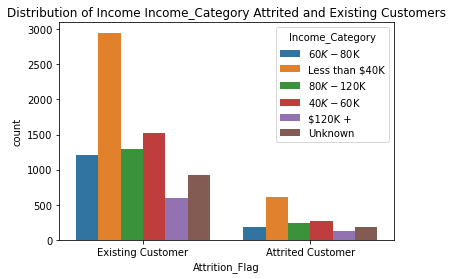

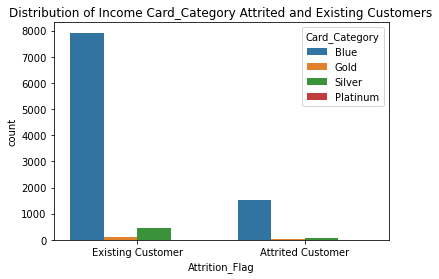

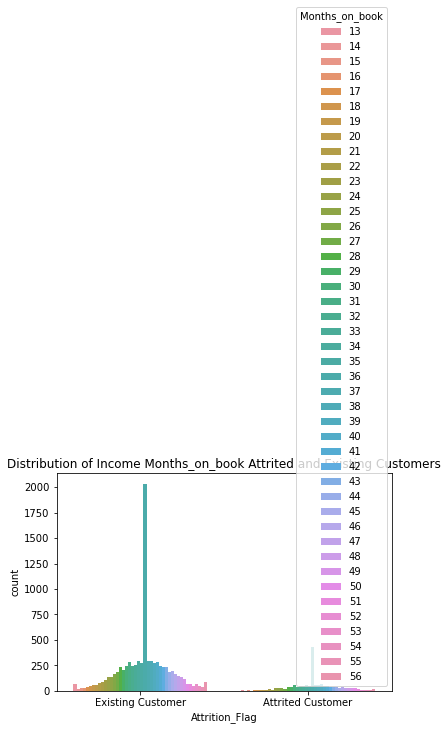

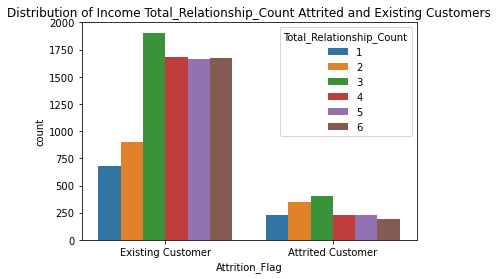

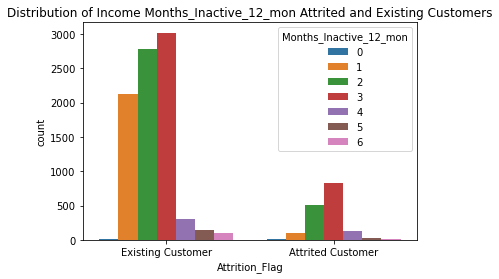

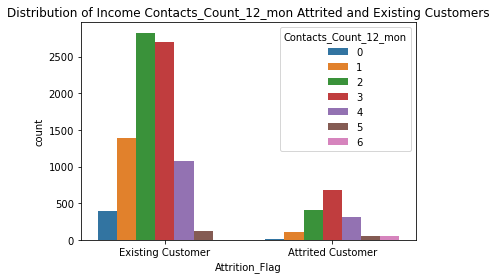

In [6]:
# count plot
for i in df.iloc[:,1:]:
    sns.countplot(x='Attrition_Flag', data=df, hue=i)
    plt.title(f"Distribution of Income {i} Attrited and Existing Customers")
    plt.show()
    if(i == "Contacts_Count_12_mon"):
       break

In [7]:
x=df.drop("Attrition_Flag",axis=1)
y=df.Attrition_Flag


# spliting numerical from object columns
x_num =x[x.select_dtypes(['int64',"float64"]).columns] 
x_obj =pd.get_dummies(x[x.select_dtypes(['object']).columns],drop_first=True)



In [8]:
# scaling numericals
scaler = MinMaxScaler()
scaler.fit(x_num)
x_scaled = pd.DataFrame(scaler.transform(x_num),columns=x_num.columns,index=x_num.index)
x_num.sample(5)


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9659,44,5,33,3,3,2,9073.0,2466,6607.0,0.446,6793,60,1.069,0.272
9850,29,1,17,6,1,3,17744.0,829,16915.0,0.851,9658,78,0.773,0.047
2934,46,3,42,3,3,4,9227.0,938,8289.0,0.735,3948,74,0.721,0.102
1819,33,2,21,5,1,4,1475.0,986,489.0,0.896,1896,33,0.833,0.668
1812,31,1,20,5,3,3,13734.0,0,13734.0,0.855,2566,74,0.762,0.000


In [9]:
# label encoding
x_dum=pd.get_dummies(x[x.select_dtypes(['object']).columns],drop_first=True)
x_dum.sample(9)

,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
2745,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
3200,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
7358,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
5069,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
5824,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1821,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
764,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
2826,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
4688,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0


In [10]:
# concat lableed and scaled
x_prep=pd.concat([x_scaled, x_dum], axis=1)

x_prep.dtypes

Customer_Age                      float64
Dependent_count                   float64
Months_on_book                    float64
Total_Relationship_Count          float64
Months_Inactive_12_mon            float64
Contacts_Count_12_mon             float64
Credit_Limit                      float64
Total_Revolving_Bal               float64
Avg_Open_To_Buy                   float64
Total_Amt_Chng_Q4_Q1              float64
Total_Trans_Amt                   float64
Total_Trans_Ct                    float64
Total_Ct_Chng_Q4_Q1               float64
Avg_Utilization_Ratio             float64
Gender_M                            uint8
Education_Level_Doctorate           uint8
Education_Level_Graduate            uint8
Education_Level_High School         uint8
Education_Level_Post-Graduate       uint8
Education_Level_Uneducated          uint8
Education_Level_Unknown             uint8
Marital_Status_Married              uint8
Marital_Status_Single               uint8
Marital_Status_Unknown            

In [11]:
y_dum=pd.get_dummies(y,drop_first=True)
y_dum.sample(15)
#y_dum.dtypes

,Existing Customer
7825,0
5652,0
2010,1
6771,1
6475,1
8499,1
3546,1
8862,1
7569,0
6421,1



### END OF PRE PROCESSING


In [13]:
x_prep.dtypes

Customer_Age                      float64
Dependent_count                   float64
Months_on_book                    float64
Total_Relationship_Count          float64
Months_Inactive_12_mon            float64
Contacts_Count_12_mon             float64
Credit_Limit                      float64
Total_Revolving_Bal               float64
Avg_Open_To_Buy                   float64
Total_Amt_Chng_Q4_Q1              float64
Total_Trans_Amt                   float64
Total_Trans_Ct                    float64
Total_Ct_Chng_Q4_Q1               float64
Avg_Utilization_Ratio             float64
Gender_M                            uint8
Education_Level_Doctorate           uint8
Education_Level_Graduate            uint8
Education_Level_High School         uint8
Education_Level_Post-Graduate       uint8
Education_Level_Uneducated          uint8
Education_Level_Unknown             uint8
Marital_Status_Married              uint8
Marital_Status_Single               uint8
Marital_Status_Unknown            

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_prep, y_dum, test_size=0.3,shuffle=True, random_state=42)

In [16]:
model = Sequential([
    Dense(64, input_dim=32, activation='relu'),
    Dense(32, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

# compile the model
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# fit the model
history = model.fit(x_prep, y_dum, epochs=150, validation_split = 0.3,shuffle=True, batch_size=32,verbose=1)

Epoch 1/150
222/222 [==============================] - 2s 4ms/step - loss: 0.5633 - accuracy: 0.8571 - val_loss: 0.5041 - val_accuracy: 0.8088
Epoch 2/150
222/222 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8993 - val_loss: 0.4548 - val_accuracy: 0.8506
Epoch 3/150
222/222 [==============================] - 0s 2ms/step - loss: 0.2707 - accuracy: 0.9063 - val_loss: 0.4682 - val_accuracy: 0.8536
Epoch 4/150
222/222 [==============================] - 1s 2ms/step - loss: 0.2476 - accuracy: 0.9114 - val_loss: 0.5086 - val_accuracy: 0.8490
Epoch 5/150
222/222 [==============================] - 1s 2ms/step - loss: 0.2435 - accuracy: 0.9121 - val_loss: 0.5074 - val_accuracy: 0.8506
Epoch 6/150
222/222 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 0.9113 - val_loss: 0.5640 - val_accuracy: 0.8358
Epoch 7/150
222/222 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.9118 - val_loss: 0.4986 - val_accuracy: 0.8526

In [17]:
predictions = model.predict(x_test, batch_size=10, verbose=1)
rounded_predictions = []
for i in predictions:
    if i >= 0.5:
        rounded_predictions.append(1)
    else:
        rounded_predictions.append(0)
        
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)

304/304 [==============================] - 0s 1ms/step


In [18]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.viridis):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
        horizontalalignment ="center",
        color="black" if cm[i, j] > thresh else "white")
    
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Confusion matrix, without normalization
[[ 381  115]
 [  75 2468]]


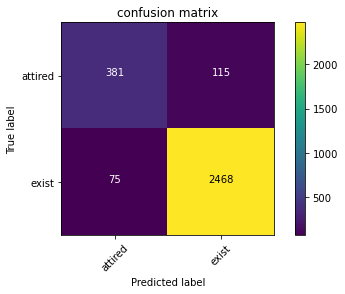

In [19]:
cm_plot_labels = ["attired",'exist']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="confusion matrix")

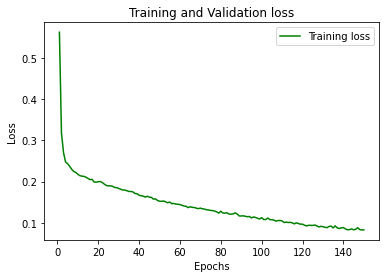

In [21]:
loss_train = history.history['loss']
epochs = range(1,151)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

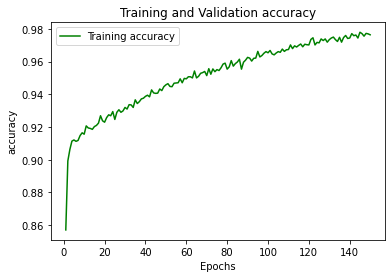

In [22]:
loss_train = history.history['accuracy']
epochs = range(1,151)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

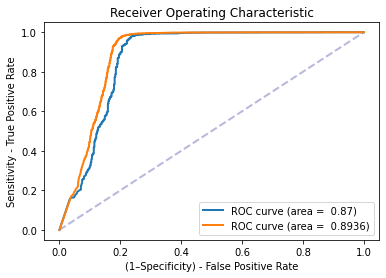

In [23]:
from sklearn import metrics

plt.figure()

#curve 1 y_test y_pred
y_pred = model.predict(x_test).ravel()
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.15)
plt.plot(fpr, tpr, lw=lw, label=f'ROC curve (area = {roc_auc: 0.2f})')
plt.legend(loc="lower right")

#curve 2 x_prep y_dum
y_pred = model.predict(x_prep).ravel()
fpr, tpr, thresholds = metrics.roc_curve(y_dum, y_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.15)
plt.plot(fpr, tpr, lw=lw, label=f'ROC curve (area = {roc_auc: 0.4f})')
plt.legend(loc="lower right")


plt.xlabel('(1–Specificity) - False Positive Rate')
plt.ylabel('Sensitivity - True Positive Rate')
plt.title(f'Receiver Operating Characteristic')
plt.show()